word embedding as a side-effect

vocabulary = unique words



# Word2Vec: Wat zijn CBOW en Skip-Gram?

Word2Vec leert woordbetekenissen door te kijken naar welke woorden samen in zinnen voorkomen.
Dit kan op twee manieren: **CBOW** en **Skip-Gram**. Deze twee zijn elkaars tegenpolen.

---

## 1. CBOW (Continuous Bag of Words)

**CBOW probeert het middenwoord te voorspellen op basis van de omringende woorden.**

Voorbeeldzin:

```
Ik ____ graag voetbal.
```

De woorden eromheen zijn:

```
Ik, graag, voetbal
```

CBOW probeert het ontbrekende woord te raden:

```
Ik, graag, voetbal → speel
```

**Kort gezegd:**
Context → Voorspel het middenwoord.

---

## 2. Skip-Gram

**Skip-Gram doet het omgekeerde van CBOW.
Het probeert de omringende woorden te voorspellen op basis van één woord.**

Voorbeeld:

```
speel
```

Skip-Gram probeert te raden welke woorden waarschijnlijk in de buurt staan:

```
speel → ik
speel → graag
speel → voetbal
```

**Kort gezegd:**
Middenwoord → Voorspel de context.

---

## 3. Verschil tussen CBOW en Skip-Gram

| Eigenschap            | CBOW             | Skip-Gram        |
| --------------------- | ---------------- | ---------------- |
| Wat wordt voorspeld?  | Middenwoord      | Contextwoorden   |
| Richting              | Context → Target | Target → Context |
| Snelheid              | Sneller          | Langzamer        |
| Kleine datasets       | Minder goed      | Zeer goed        |
| Zeldzame woorden      | Minder goed      | Beter            |
| Semantische kwaliteit | Goed             | Vaak beter       |

---

## 4. Eén zin om het te onthouden

**CBOW raadt het middenwoord, Skip-Gram raadt de buren.**

Beide leren uiteindelijk **betekenisvolle woordvectoren** die gebruikt worden in NLP-taken.

---


WE ARE BUILDING A WORD2VEC MODEL NOW

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 54.4 MB/s eta 0:00:00


In [ ]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.6 MB/s eta 0:00:00


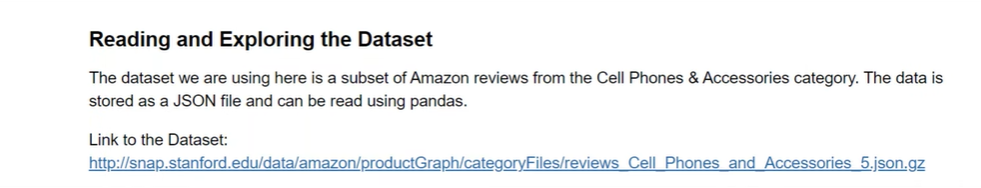

In [ ]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz


--2025-11-13 22:00:00--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45409631 (43M) [application/x-gzip]
Saving to: ‘reviews_Cell_Phones_and_Accessories_5.json.gz’

reviews_Cell_Phones 100%[===================>]  43.31M  23.8MB/s    in 1.8s    

2025-11-13 22:00:02 (23.8 MB/s) - ‘reviews_Cell_Phones_and_Accessories_5.json.gz’ saved [45409631/45409631]



In [ ]:
import gzip
import shutil

with gzip.open("reviews_Cell_Phones_and_Accessories_5.json.gz", "rb") as f_in:
    with open("reviews_Cell_Phones_and_Accessories_5.json", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)


In [ ]:
import gensim
import pandas as pd

In [ ]:
df = pd.read_json("reviews_Cell_Phones_and_Accessories_5.json", lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [ ]:
df.shape

(194439, 9)

In [ ]:
df.reviewText[0]

text = df.reviewText[0]

In [ ]:
text

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

First step is preprocessing

In [ ]:
gensim.utils.simple_preprocess(text)

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

In [ ]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

review_text


,reviewText
0,"[they, look, good, and, stick, good, just, don..."
1,"[these, stickers, work, like, the, review, say..."
2,"[these, are, awesome, and, make, my, phone, lo..."
3,"[item, arrived, in, great, time, and, was, in,..."
4,"[awesome, stays, on, and, looks, great, can, b..."
...,...
194434,"[works, great, just, like, my, original, one, ..."
194435,"[great, product, great, packaging, high, quali..."
194436,"[this, is, great, cable, just, as, good, as, t..."
194437,"[really, like, it, becasue, it, works, well, w..."


In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4

)



In [ ]:
model.build_vocab(review_text, progress_per=1000)

In [ ]:
model.epochs = 10

model.epochs

10

Betekenis van epochs = 5

Je Word2Vec-model gaat 5 keer door de volledige dataset heen tijdens het trainen.

Met andere woorden:

Het model leest alle zinnen 5 keer.

Elke keer worden de woordvectoren opnieuw geüpdatet en verbeterd.

Na 5 volledige rondes stopt het trainen.

In [ ]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)



(123010562, 167737950)

In [ ]:
model.save("trained.model")

In [ ]:
model.wv.most_similar("bad")

[('terrible', 0.6639007329940796),
 ('shabby', 0.5996449589729309),
 ('good', 0.5922743678092957),
 ('horrible', 0.5732122659683228),
 ('awful', 0.5367793440818787),
 ('okay', 0.521665632724762),
 ('keen', 0.5215438604354858),
 ('funny', 0.5146842002868652),
 ('crappy', 0.5132299661636353),
 ('poor', 0.5123932957649231)]

In [ ]:
model.wv.most_similar("bad")

[('terrible', 0.6652278304100037),
 ('shabby', 0.6511196494102478),
 ('good', 0.5960138440132141),
 ('horrible', 0.5690414309501648),
 ('legit', 0.556293249130249),
 ('exciting', 0.5317619442939758),
 ('sad', 0.5315439701080322),
 ('flattering', 0.5236180424690247),
 ('disappointing', 0.5210651159286499),
 ('poor', 0.5169845819473267)]

In [ ]:
model.wv.similarity(w1= "hello", w2= "bye")

np.float32(0.24572442)

In [ ]:
model.wv.similarity(w1= "work", w2= "time")

np.float32(0.08699009)

In [ ]:
model.wv.get_vector("work").shape

(100,)